## DS 3000 Project Proposal
## By: Darsheen Chona

###  IMPACT OF MACRO ECONOMIC FACTORS ON NETFLIX'S FINANCIAL PERFORMANCE AND STOCK PRICE

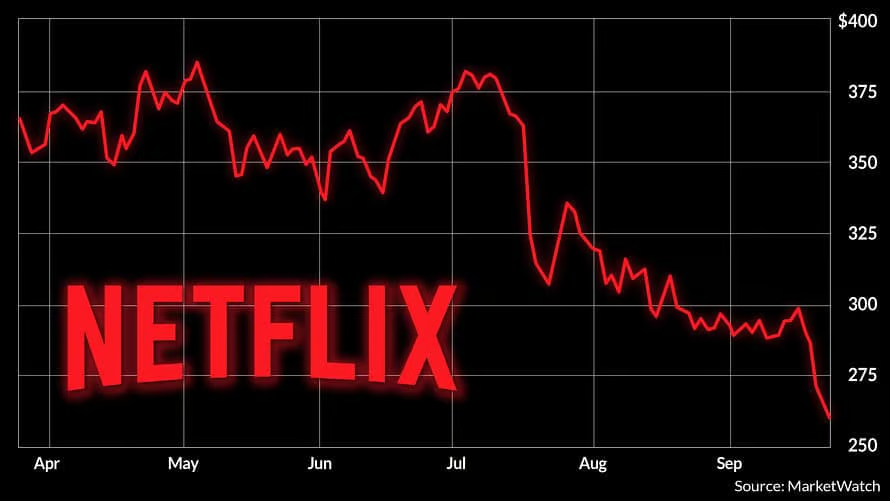

#### Problem: 

Understanding a company's profit, revenue, and debt structure is important, but these alone don't fully explain its stock price movements. Macroeconomic factors also have a significant impact on stock prices. By analyzing how these external factors influence the market, we can make more informed investment decisions and potentially increase our returns. The challenge lies in identifying and quantifying the effects of these macroeconomic elements to enhance our stock investment strategies.

#### Key Questions:

1. How do macro economic factors like GDP, Unemployment rate, CPI, retail sales and industrial output correlate with the financial performance of Netflix?
2. How do the macro economic factors like inflation affect the stock price of Netflix?

#### Here are a few sources that talk about Netflix's stock price getting affected because of economic factors: 

1. https://www.plus500.com/en/instruments/nflx/netflix-stock-price-guide~1#:~:text=Economic%20Conditions%3A%20Broader%20macroeconomic%20events,to%20subscribe%20to%20streaming%20services. "  Broader macroeconomic events also significantly influence Netflix's share price. Factors such as interest rate hikes, economic downturns, and high inflation can reduce potential subscribers' disposable income, making them less likely to subscribe to streaming services. Economic uncertainty can make Netflix shares less appealing to investors, potentially leading to a decrease in share price."

2. https://www.edrawmax.com/artcile/netflix-pestel-analysis.html : "The purchasing power of the customer can determine the revenue of Netflix." The purchasing power of the customer is dependent on macro economic factors like employment rates, earnings per year etc.


### Data Collection :

#### 
I will be using data from 2 sources. one will be data from Federal Reserve Bank for the macro economic factors which has the level of inflation, GDP, unemployment rates for USA for different time periods. I will be using this, making a dictionary, with keys as GDP, inflation level etc and their values as pairs and then creating a dataframe and cleaning it to use it for ML. Second one will be from a third party which holds historic stock information to get the financial performance records of Netflix. This second source I am still unsure about and I might use another third party source. I will check if the macro economic factors from the first datasource correlate with the netflix's financial performance and stock prices using ML model and regression models.

##### API KEY FROM FRED : 7a802e204a08789569034837ff203fb7
#### API KEY FROM APLHA VANTAGE : 15PYLPBPBWYFZL70 


In [17]:
import requests
import pandas as pd

In [30]:
api_key = '7a802e204a08789569034837ff203fb7'
url_base = 'https://api.stlouisfed.org/fred/series/observations'

def fetch_and_clean_data(series_ids, start_date='2000-01-01', end_date='2024-12-31'):
    """ pulls macro economic data from the given series ID with specified start and 
        end date and cleans the data
    
    Args:
        series_ids (list): list of macro economic series id to get from the API
        start_date (str) : start date for collecting data in YY-MM-DD format
        end_date (str) : end date for collecting data in YY-MM-DD format
    Returns:
        merged_df (DataFrame): a merged dataframe with numerical and categorical data from
                                the series requested. Each column corrosponds to a series ID 
                                with its values
    """
    # creating an empty list to store all values
    all_data = []
     
    # using for loop to iterate through each series ID to get data from API key  
    for series_id in series_ids:
        params = {
            'series_id': series_id,
            'api_key': api_key,
            'file_type': 'json',
            'observation_start': start_date,
            'observation_end': end_date
        }
        
        # sending a request to API
        response = requests.get(url_base, params=params)
        data = response.json()['observations']
        
        # Creating the dataframe
        df = pd.DataFrame(data)
        df = df[['date', 'value']]
        
        # converting the values to numeric and date in datetime format
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        df['date'] = pd.to_datetime(df['date'])
        
        # renaming the value columns to series ID
        df.rename(columns={'value': series_id}, inplace=True)
        
        # Append dataFrame to the list
        all_data.append(df)

    # Adding categorical feature: Inflation Level
    if 'CPIAUCSL' in series_ids:
        merged_df['Inflation_Level'] = pd.cut(merged_df['CPIAUCSL'], 
                                              bins=[-float('inf'), 2, 3, float('inf')], 
                                              labels=['Low', 'Medium', 'High'])
    
    # calculating GDP growth rate and categorizing it as recession, stagnation or growth
    if 'GDP' in series_ids:
        merged_df['GDP_Growth_Rate'] = merged_df['GDP'].pct_change() * 100
        merged_df['GDP_Growth_Stage'] = pd.cut(merged_df['GDP_Growth_Rate'], 
                                               bins=[-float('inf'), 0, 2, float('inf')], 
                                               labels=['Recession', 'Stagnation', 'Growth'])

    # Saving the merged DataFrame to a CSV file
    merged_df.to_csv('macro_data.csv')

    return merged_df


In [31]:
# list of series ID
series_ids = ['GDP', 'UNRATE', 'CPIAUCSL', 'RSAFS', 'INDPRO']
merged_df = fetch_and_clean_data(series_ids)

/var/folders/zk/nk76x8qj7w7_qbtd9m_52nfw0000gn/T/ipykernel_15493/1849478996.py:56: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  merged_df['GDP_Growth_Rate'] = merged_df['GDP'].pct_change() * 100


In [32]:
# Printing the few first rows of the merged dataframe
merged_df.head()

,date,GDP,UNRATE,CPIAUCSL,RSAFS,INDPRO,Inflation_Level,GDP_Growth_Rate,GDP_Growth_Stage
0,2000-01-01,10002.179,4.0,169.3,268044.0,91.4092,High,NaN,NaN
1,2000-04-01,10247.720,3.8,170.9,271046.0,92.6659,High,2.454875,Growth
2,2000-07-01,10318.165,4.0,172.7,272630.0,92.8373,High,0.687421,Stagnation
3,2000-10-01,10435.744,3.9,173.9,276927.0,92.6400,High,1.139534,Stagnation
4,2001-01-01,10470.231,4.2,175.6,278834.0,91.8908,High,0.330470,Stagnation


### Citation used :

used .cut using https://www.geeksforgeeks.org/pandas-cut-method-in-python/ documentation

And pct_change using https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

#### Data Usage and Remaining Issues:

The aim of this analysis is to explore how various macroeconomic factors influence Netflix's financial performance and stock price. By examining data on GDP, unemployment rate, inflation (CPI), retail sales, and industrial output, the goal is to uncover correlations between these economic indicators and Netflix's profitability as well as stock movements. Two primary questions guide this study: (1) What relationships exist between macroeconomic factors like GDP, CPI, unemployment rate, and Netflix’s financial performance? and (2) How does inflation, in particular, impact Netflix’s stock price?

For the analysis, two key data sources will be utilized: macroeconomic data from one source, and Netflix's financial and stock performance from another. Eventually, once machine learning techniques are covered, regression analysis could be applied to predict how changes in these economic indicators may affect Netflix’s revenue or stock price. Additionally, classification algorithms could help categorize periods of economic change (such as recessions or periods of growth) and analyze their influence on Netflix’s overall performance. One example of how I plan to use the ML model is to find out how the inflation level in the economy affects the netflix's current stock price

One significant issue is the need for additional data cleaning, particularly in handling missing values (NaNs) that may affect the reliability of the analysis. I am still fiding the best possible way to tackle it so that I can run my regression analysis on this missing data.

Additionally, I am still in the process of finding a reliable third-party source for Netflix's complete stock history, which is crucial for accurate analysis. Once this is resolved, the combined data on Netflix’s stock performance and macroeconomic factors will allow for more predictive models.